# **Rupam Das**
*dasrupam59@gmail.com*
 
## Code Clause Internship in Data Science (June, 2023)
## Task 4 :- Price recommendation for online sellers (Golden Project)


-------------------------------------------------------------------------------------------------------------------------------------------



# Example 1


* Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.
* A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

## Recommendation System - Part I

##  **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.express as px
import matplotlib.pyplot as plt

# Import Data File

In [2]:
df=pd.read_csv("Online Retail csv.csv",encoding = 'ISO-8859-1')
df= df.dropna()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/2011 12:50,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/2011 12:50,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


# Info of Data Types

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


# Shape of Data File

In [5]:
df.shape

(406829, 8)


# 1) Product popularity based recommendation system targeted at new customers
 

______________________________________________________________________________________________________________________________________________________

Product Description popularity according to quantity

In [6]:
popular_products_description = pd.DataFrame(df.groupby('Description')['Quantity'].count())
most_popular_des = popular_products_description.sort_values('Quantity', ascending=False)
most_popular_des.head(10)

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2070
REGENCY CAKESTAND 3 TIER,1905
JUMBO BAG RED RETROSPOT,1662
ASSORTED COLOUR BIRD ORNAMENT,1418
PARTY BUNTING,1416
LUNCH BAG RED RETROSPOT,1358
SET OF 3 CAKE TINS PANTRY DESIGN,1232
POSTAGE,1196
LUNCH BAG BLACK SKULL.,1126


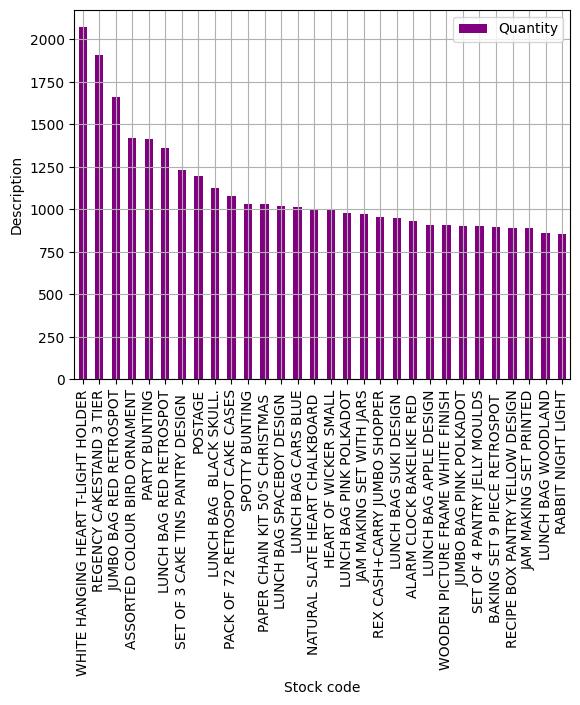

In [7]:
most_popular_des.head(30).plot(kind = "bar" , color = 'purple')
plt.xlabel("Stock code")
plt.ylabel("Description")
plt.grid(True)
plt.show()

 Determination of most popular product with respect to StockID and Quantity


In [8]:
popular_products = pd.DataFrame(df.groupby('Country')['Quantity'].count())
most_popular = popular_products.sort_values('Quantity', ascending=False)
most_popular.head(10)

,Quantity
Country,
United Kingdom,361878
Germany,9495
France,8491
EIRE,7485
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1480


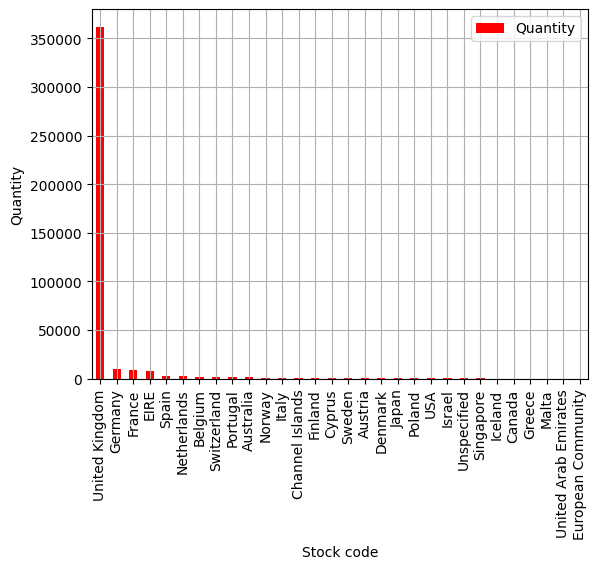

In [9]:
most_popular.head(30).plot(kind = "bar" , color = 'red') 
plt.xlabel("Stock code")
plt.ylabel("Quantity")
plt.grid(True)
plt.show()

 Country wise quantity determination

In [10]:
popular_products_country_wise = pd.DataFrame(df.groupby('Country')['Quantity'].count())
most_popular_1 = popular_products_country_wise.sort_values('Quantity', ascending=False)
most_popular_1.head(10)

,Quantity
Country,
United Kingdom,361878
Germany,9495
France,8491
EIRE,7485
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1480


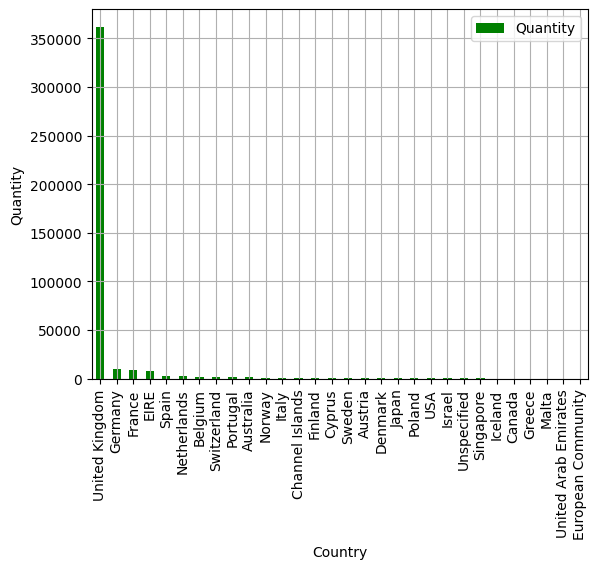

In [11]:
most_popular_1.head(30).plot(kind = "bar" , color = 'green') 
plt.xlabel("Country")
plt.ylabel("Quantity")
plt.grid(True)
plt.show()

 Country wise unit price determination

In [12]:
product_expensive_chart = pd.DataFrame(df.groupby('Country')['UnitPrice'].count())
most_exp = product_expensive_chart.sort_values('UnitPrice', ascending=False)
most_exp.head()

,UnitPrice
Country,
United Kingdom,361878
Germany,9495
France,8491
EIRE,7485
Spain,2533


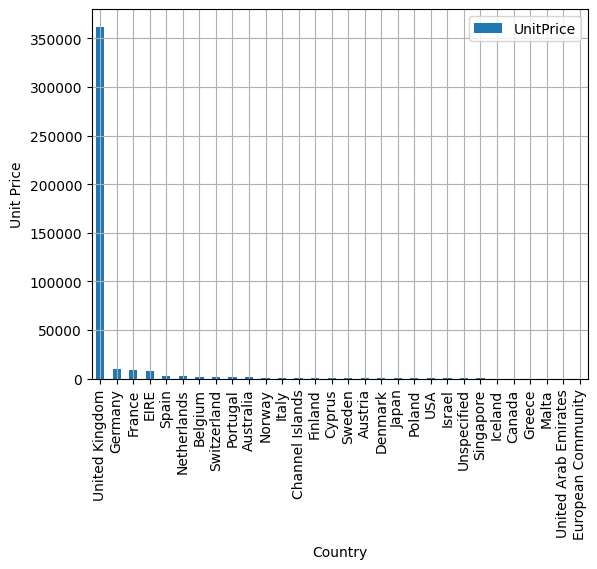

In [13]:
most_exp.head(30).plot(kind = "bar")
plt.xlabel("Country")
plt.ylabel("Unit Price")
plt.grid(True)
plt.show()

# **Statistacial Summary**

In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
df.describe(include=object)

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,406829,406829,406829,406829,406829
unique,22190,3684,3896,20460,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,11/14/2011 15:27,United Kingdom
freq,542,2077,2070,543,361878


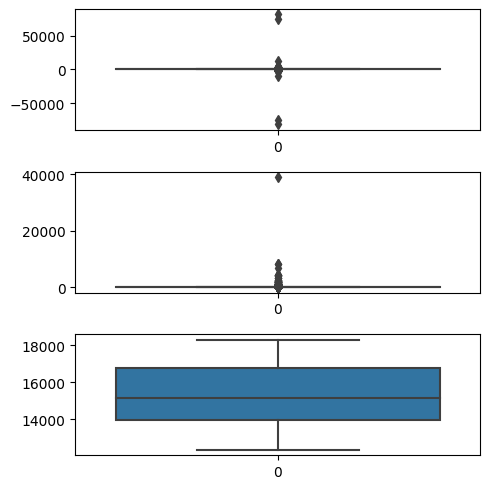

In [16]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['Quantity'], ax = axs[0])
plt2 = sns.boxplot(df['UnitPrice'], ax = axs[1])
plt3 = sns.boxplot(df['CustomerID'], ax = axs[2])
plt.tight_layout()

# MISSING VALUE TREATMENT

In [17]:
df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
df = df.loc[df['Quantity'] > 0]
df = df.loc[df['UnitPrice'] > 0]

In [19]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
df.loc[df['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [21]:
df.nunique()


InvoiceNo      18532
StockCode       3665
Description     3877
Quantity         301
InvoiceDate    17282
UnitPrice        440
CustomerID      4338
Country           37
dtype: int64

In [22]:
df.shape

(397884, 8)

In [23]:
df = df.dropna(subset=['CustomerID'])

In [24]:
df.shape

(397884, 8)

In [25]:
df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# 2) Model Based Collaborative Filtering

* Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.
* A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

The models created by collaborative filtering techniques are based on the prior actions of a user (things previously chosen or purchased, and/or numerical ratings given to those items), as well as comparable choices made by other users. Then, this model is used to forecast the ratings for things or items themselves that the user could be interested in.

In [26]:
customer_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity',aggfunc='sum')
customer_item_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [27]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
customer_item_matrix.shape


(4338, 3665)

 **(A) Creating User-to-User Similarity Matrix**

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))
user_user_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,4328,4329,4330,4331,4332,4333,4334,4335,4336,4337
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
4334,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
4335,0.0,0.113776,0.000000,0.067574,0.000000,0.037582,0.0,0.000000,0.160128,0.079305,...,0.0,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000
4336,0.0,0.109364,0.170905,0.137124,0.044866,0.080278,0.0,0.113354,0.034204,0.093170,...,0.0,0.037184,0.016480,0.043602,0.000000,0.000000,0.046613,0.017800,1.000000,0.096334


In [30]:
user_user_sim_matrix.shape

(4338, 4338)

In [31]:
user_user_sim_matrix.columns = customer_item_matrix.index

user_user_sim_matrix['CustomerID'] = customer_item_matrix.index

user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [32]:
user_user_sim_matrix.loc[12557].sort_values(ascending=False)

CustomerID
12557.0    1.000000
15970.0    0.544949
17083.0    0.527046
12939.0    0.507093
12732.0    0.447214
             ...   
14642.0    0.000000
14643.0    0.000000
14644.0    0.000000
14647.0    0.000000
18287.0    0.000000
Name: 12557.0, Length: 4338, dtype: float64

In [33]:
items_bought_by_12557 = set(customer_item_matrix.loc[12557].iloc[customer_item_matrix.loc[12557].to_numpy().nonzero()].index)
items_bought_by_12557

{'20725',
 '20727',
 '20728',
 '21238',
 '21239',
 '21240',
 '21242',
 '21243',
 '21244',
 '22383',
 '22384',
 '84997A',
 '84997B',
 '84997C',
 '84997D'}

In [34]:
items_bought_by_12431 = set(customer_item_matrix.loc[12431.0].iloc[customer_item_matrix.loc[12431.0].to_numpy().nonzero()].index)
items_bought_by_12431

{'15056BL',
 '16169E',
 '20675',
 '20677',
 '20685',
 '20712',
 '20719',
 '20724',
 '20725',
 '20726',
 '21000',
 '21001',
 '21080',
 '21094',
 '21115',
 '21164',
 '21217',
 '21239',
 '21240',
 '21242',
 '21243',
 '21244',
 '21245',
 '21428',
 '21481',
 '21507',
 '21524',
 '21527',
 '21533',
 '21537',
 '21555',
 '21622',
 '21706',
 '21707',
 '21731',
 '21745',
 '21770',
 '21791',
 '21880',
 '21883',
 '21931',
 '21933',
 '21935',
 '21936',
 '21937',
 '22027',
 '22029',
 '22037',
 '22045',
 '22090',
 '22131',
 '22138',
 '22191',
 '22192',
 '22193',
 '22194',
 '22195',
 '22196',
 '22204',
 '22219',
 '22326',
 '22328',
 '22329',
 '22352',
 '22354',
 '22356',
 '22382',
 '22383',
 '22385',
 '22411',
 '22413',
 '22423',
 '22466',
 '22467',
 '22492',
 '22505',
 '22617',
 '22629',
 '22631',
 '22690',
 '22692',
 '22697',
 '22698',
 '22699',
 '22712',
 '22726',
 '22727',
 '22728',
 '22729',
 '22730',
 '22785',
 '22786',
 '22835',
 '22846',
 '22859',
 '22907',
 '22941',
 '22951',
 '22965',
 '22966

In [35]:
items_to_recommend_to_12557 = items_bought_by_12557 - items_bought_by_12431
items_to_recommend_to_12557

{'20727', '20728', '21238', '22384', '84997A', '84997B', '84997C', '84997D'}

In [36]:
df.loc[df['StockCode'].isin(items_to_recommend_to_12557), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode')

,Description
StockCode,
84997B,RED 3 PIECE RETROSPOT CUTLERY SET
84997C,BLUE 3 PIECE POLKADOT CUTLERY SET
22384,LUNCH BAG PINK POLKADOT
20728,LUNCH BAG CARS BLUE
20727,LUNCH BAG BLACK SKULL.
84997D,PINK 3 PIECE POLKADOT CUTLERY SET
84997A,GREEN 3 PIECE POLKADOT CUTLERY SET
21238,RED RETROSPOT CUP
84997C,CHILDRENS CUTLERY POLKADOT BLUE


In [37]:
most_similar_user = user_user_sim_matrix.loc[12557].sort_values(ascending=False).reset_index().iloc[1, 0]
most_similar_user

15970.0

In [38]:
def get_items_to_recommend_cust(cust_a): 
  most_similar_user = user_user_sim_matrix.loc[cust_a].sort_values(ascending=False).reset_index().iloc[1, 0]
  items_bought_by_cust_a = set(customer_item_matrix.loc[cust_a].iloc[customer_item_matrix.loc[cust_a].to_numpy().nonzero()].index)
  items_bought_by_cust_b = set(customer_item_matrix.loc[most_similar_user].iloc[customer_item_matrix.loc[most_similar_user].to_numpy().nonzero()].index)
  items_to_recommend_to_a = items_bought_by_cust_b - items_bought_by_cust_a
  items_description = df.loc[df['StockCode'].isin(items_to_recommend_to_a), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode')
  return items_description

In [39]:
get_items_to_recommend_cust(12557.0)

,Description
StockCode,
22662,LUNCH BAG DOLLY GIRL DESIGN
22382,LUNCH BAG SPACEBOY DESIGN
22551,PLASTERS IN TIN SPACEBOY
85032C,CURIOUS IMAGES GIFT WRAP SET


In [40]:
get_items_to_recommend_cust(12431.0)


,Description
StockCode,
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
22749,FELTCRAFT PRINCESS CHARLOTTE DOLL
22960,JAM MAKING SET WITH JARS
22913,RED COAT RACK PARIS FASHION
22914,BLUE COAT RACK PARIS FASHION
...,...
23382,BOX OF 6 CHRISTMAS CAKE DECORATIONS
23480,MINI LIGHTS WOODLAND MUSHROOMS
22950,SET OF 36 VINTAGE CHRISTMAS DOILIES


 **(B) Creating Ite to Item similarity matrix**

In [41]:
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
item_item_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664
0,1.000000,0.0,0.094868,0.091287,0.0,0.000000,0.090351,0.062932,0.098907,0.095346,...,0.0,0.0,0.0,0.0,0.0,0.029361,0.0,0.067591,0.0,0.078217
1,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.032774,0.045655,0.047836,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016345,0.0,0.000000
2,0.094868,0.0,1.000000,0.115470,0.0,0.000000,0.057143,0.059702,0.041703,0.060302,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.071247,0.0,0.010993
3,0.091287,0.0,0.115470,1.000000,0.0,0.000000,0.164957,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,1.0,0.447214,0.063888,0.044499,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [42]:
item_item_sim_matrix.shape


(3665, 3665)

In [43]:
item_item_sim_matrix.columns = customer_item_matrix.T.index

item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')
item_item_sim_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.0,0.094868,0.091287,0.0,0.000000,0.090351,0.062932,0.098907,0.095346,...,0.0,0.0,0.0,0.0,0.0,0.029361,0.0,0.067591,0.0,0.078217
10080,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.032774,0.045655,0.047836,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016345,0.0,0.000000
10120,0.094868,0.0,1.000000,0.115470,0.0,0.000000,0.057143,0.059702,0.041703,0.060302,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.071247,0.0,0.010993
10123C,0.091287,0.0,0.115470,1.000000,0.0,0.000000,0.164957,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
10124A,0.000000,0.0,0.000000,0.000000,1.0,0.447214,0.063888,0.044499,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [44]:
item_item_sim_matrix.loc['10002'].sort_values(ascending=False)


StockCode
10002     1.000000
90103     0.223607
21826     0.197642
16010     0.182574
90059B    0.182574
            ...   
23039     0.000000
17011F    0.000000
23038     0.000000
17001     0.000000
84744     0.000000
Name: 10002, Length: 3665, dtype: float64

In [45]:
top_10_similar_items = list(item_item_sim_matrix.loc['10002'].sort_values(ascending=False).iloc[:10].index)
top_10_similar_items

['10002',
 '90103',
 '21826',
 '16010',
 '90059B',
 '90059C',
 '90059E',
 '90059F',
 '90101',
 '84535A']

In [46]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [47]:
df.loc[df['StockCode'] == '90210A']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28848,538661,90210A,GREY ACRYLIC FACETED BANGLE,12,12/13/2010 15:42,1.25,15194.0,United Kingdom
28887,538662,90210A,GREY ACRYLIC FACETED BANGLE,12,12/13/2010 15:44,1.25,15159.0,United Kingdom
56707,541110,90210A,GREY ACRYLIC FACETED BANGLE,2,1/13/2011 15:11,2.95,15916.0,United Kingdom


In [48]:
df.loc[df['StockCode'] == '90210A'][:1]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28848,538661,90210A,GREY ACRYLIC FACETED BANGLE,12,12/13/2010 15:42,1.25,15194.0,United Kingdom


In [49]:
df.loc[df['StockCode'].isin(top_10_similar_items), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

,Description
StockCode,
10002,INFLATABLE POLITICAL GLOBE
90103,PURPLE FRANGIPANI NECKLACE
21826,EIGHT PIECE DINOSAUR SET
16010,FOLDING CAMPING SCISSOR W/KNIF & S
90059B,DIAMANTE HAIR GRIP PACK/2 BLACK DIA
90059C,DIAMANTE HAIR GRIP PACK/2 MONTANA
90059E,DIAMANTE HAIR GRIP PACK/2 RUBY
90059F,DIAMANTE HAIR GRIP PACK/2 LT ROSE
90101,WHITE FRANGIPANI NECKLACE


In [50]:
def get_top_similar_items(item):
  top_10_similar_items = list(item_item_sim_matrix.loc[item].sort_values(ascending=False).iloc[:10].index)
  top_10 = df.loc[df['StockCode'].isin(top_10_similar_items), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]
  return top_10

In [51]:
get_top_similar_items('84029E')


,Description
StockCode,
84029E,RED WOOLLY HOTTIE WHITE HEART.
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
21479,WHITE SKULL HOT WATER BOTTLE
21485,RETROSPOT HEART HOT WATER BOTTLE
22111,SCOTTIE DOG HOT WATER BOTTLE
22112,CHOCOLATE HOT WATER BOTTLE
22114,HOT WATER BOTTLE TEA AND SYMPATHY
23355,HOT WATER BOTTLE KEEP CALM
84030E,ENGLISH ROSE HOT WATER BOTTLE


In [52]:
amazon_ratings1 = df.head(10000)

In [53]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Quantity', index='UnitPrice', columns='CustomerID', fill_value=0)
ratings_utility_matrix.head()

CustomerID,12395.0,12427.0,12431.0,12433.0,12472.0,12557.0,12567.0,12583.0,12600.0,12647.0,...,18085.0,18109.0,18113.0,18118.0,18144.0,18156.0,18168.0,18219.0,18229.0,18239.0
UnitPrice,,,,,,,,,,,,,,,,,,,,,
0.10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0
0.12,0,0,0.0,0.0,24.0,0.0,0.0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0
0.14,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0
0.16,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0
0.18,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0


In [54]:
ratings_utility_matrix.shape

(96, 390)

In [55]:
X = ratings_utility_matrix.T
X.head()

UnitPrice,0.10,0.12,0.14,0.16,0.18,0.19,0.21,0.24,0.29,0.30,...,29.95,35.00,35.75,40.00,42.95,49.95,50.00,79.95,165.00,295.00
CustomerID,,,,,,,,,,,,,,,,,,,,,
12395.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12431.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12433.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12472.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
X.shape

(390, 96)

In [57]:
X1 = X

In [58]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(390, 10)

In [59]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(390, 390)

In [60]:
X.index[100]

14180.0

In [61]:
i = "14180"

In [62]:


product_names = list(X.index)
Customer_ID = product_names.index(14180)
Customer_ID

100

In [63]:
correlation_product_ID = correlation_matrix[Customer_ID]
correlation_product_ID.shape

(390,)

In [64]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(14180) 

Recommend[0:9]

[12712.0,
 12855.0,
 12913.0,
 12915.0,
 13011.0,
 13047.0,
 13497.0,
 13748.0,
 13777.0]

# Example 2

### Recommendation System - Part II
### 1) Model Based Collaborative Filtering


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import sklearn
from sklearn.decomposition import TruncatedSVD

In [66]:
df = pd.read_csv("ratings_Beauty.csv")

In [67]:
df = df.dropna()


In [68]:
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


### Model-based collaborative filtering system

In [69]:

df1 = df.head(10000)

In [70]:
ratings_utility_matrix1 = df1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix1.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
ratings_utility_matrix1.shape

(9697, 886)

In [72]:
Z = ratings_utility_matrix1.T
Z.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
Z.shape

(886, 9697)

In [74]:
Z1 = Z

In [75]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix1 = SVD.fit_transform(Z)
decomposed_matrix1.shape

(886, 10)

In [76]:
correlation_matrix1 = np.corrcoef(decomposed_matrix1)
correlation_matrix1.shape

(886, 886)

In [77]:
Z.index[100]

'6117043058'

In [78]:
k = "6117043058"

product_names1 = list(Z.index)
product_ID1 = product_names1.index(k)
product_ID1

100

In [79]:
correlation_product_ID1 = correlation_matrix1[product_ID1]
correlation_product_ID.shape

(390,)

In [80]:
Recommend1 = list(Z.index[correlation_product_ID1 > 0.90])

# Removes the item already bought by the customer
Recommend1.remove(k) 

Recommend1[0:9]

['0558925278',
 '0737104473',
 '130414089X',
 '1304622622',
 '1403790965',
 '1457982633',
 '1906987238',
 '4057362967',
 '5357955751']

# Example 3

# Price Recomendation Process part - III

 ### 1) Item to item based recommendation system based on product description

In [81]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [82]:
dx=pd.read_csv("amazon.csv")

In [83]:
dx.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [84]:
product_descriptions = dx.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions["category"].head()

0    Computers&Accessories|Accessories&Peripherals|...
1    Computers&Accessories|Accessories&Peripherals|...
2    Computers&Accessories|Accessories&Peripherals|...
3    Computers&Accessories|Accessories&Peripherals|...
4    Computers&Accessories|Accessories&Peripherals|...
Name: category, dtype: object

In [85]:
vectorizer = TfidfVectorizer(stop_words='english')
Y1 = vectorizer.fit_transform(product_descriptions["category"])
Y1

<500x74 sparse matrix of type '<class 'numpy.float64'>'
	with 2670 stored elements in Compressed Sparse Row format>

C:\Users\dasru\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


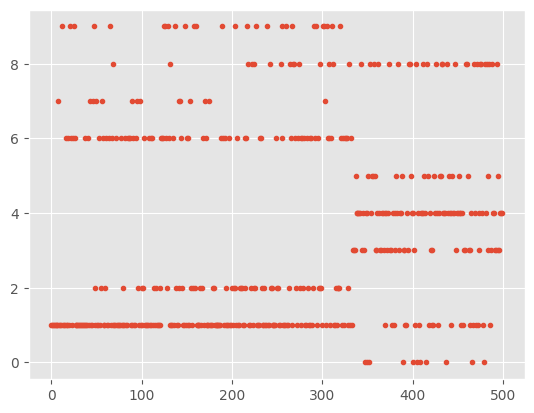

In [86]:
# Fitting K-Means to the dataset

Y=Y1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(Y)
plt.plot(y_kmeans, ".")
plt.show()


In [87]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [88]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(Y1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for j in range(true_k):
    print_cluster(j)

Top terms per cluster:
Cluster 0:
 cables
 accessories
 peripherals
 usbcables
 computers
 cableconnectionprotectors
 dvicables
 ear
 earbuds
 electronics
Cluster 1:
 televisions
 smarttelevisions
 video
 hometheater
 tv
 electronics
 standardtelevisions
 wirelessusbadapters
 deskmounts
 dvicables
Cluster 2:
 wearabletechnology
 smartwatches
 electronics
 homeaudio
 décor
 ear
 earbuds
 hdmicables
 headphones
 hometheater
Cluster 3:
 smartphones
 basicmobiles
 mobiles
 electronics
 accessories
 homeaudio
 ear
 earbuds
 hdmicables
 headphones
Cluster 4:
 remotecontrols
 video
 tv
 hometheater
 electronics
 accessories
 ceilingmounts
 tvwall
 tvmounts
 turntables
Cluster 5:
 mobileaccessories
 mobiles
 chargers
 electronics
 accessories
 wallchargers
 powerbanks
 stands
 styluspens
 homeaudio
Cluster 6:
 hdmicables
 hometheater
 tv
 video
 cables
 electronics
 accessories
 opticalcables
 rcacables
 speakercables
Cluster 7:
 wirelessusbadapters
 networkadapters
 networkingdevices
 compute

In [89]:
def show_recommendations(product):
    #print("Cluster ID:")
    m = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [90]:
show_recommendations("tool")

Cluster 0:
 cables
 accessories
 peripherals
 usbcables
 computers
 cableconnectionprotectors
 dvicables
 ear
 earbuds
 electronics


In [91]:
show_recommendations("Computer")

Cluster 0:
 cables
 accessories
 peripherals
 usbcables
 computers
 cableconnectionprotectors
 dvicables
 ear
 earbuds
 electronics
